 # Machine Learning model

# LogisticRegression_NeuralNet

In [21]:
# Import  dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [1]:
# reads cleaned data
cleaned_df = pd.read_csv('Resources/sales_cleaned.csv')
cleaned_df.head(10)

,Rank,Name,Genre,Platform,Publisher,Developer_x,Year,Total_Sales
0,1,Wii Sports,Sports,Wii,Nintendo,Nintendo EAD,2006.0,82.86
1,2,Super Mario Bros.,Platform,NES,Nintendo,Nintendo EAD,1985.0,40.24
2,3,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo EAD,2008.0,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,2017.0,36.60
4,5,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo EAD,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,GB,Nintendo,Game Freak,1998.0,31.38
6,7,New Super Mario Bros.,Platform,DS,Nintendo,Nintendo EAD,2006.0,30.80
7,8,Tetris,Puzzle,GB,Nintendo,Bullet Proof Software,1989.0,30.26
8,9,New Super Mario Bros. Wii,Platform,Wii,Nintendo,Nintendo EAD,2009.0,30.22
9,10,Minecraft,Misc,PC,Mojang,Mojang AB,2010.0,30.01


In [2]:
# reads all columns data
all_columns_df = pd.read_csv('Resources/all_columns_df.csv')
all_columns_df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,Japan,30.80
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,1989.0,Japan,30.26
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,Japan,30.22
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,2010.0,NaN,30.01


In [5]:
# Determine the number of unique values in each column.
all_columns_df.nunique()

Rank            19862
Name            13840
Genre              20
ESRB_Rating         6
Platform           40
Publisher         926
Developer_x      3185
Critic_Score       86
User_Score         44
Year               45
Country            20
Total_Sales       648
dtype: int64

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cleaned_df.drop(['Rank', 'Name', 'Year'], axis=1, inplace=True)

In [9]:
# Look at APPLICATION_TYPE value counts for binning
Developer_counts = cleaned_df['Developer_x'].value_counts()
Developer_counts

Unknown                      741
Konami                       402
Capcom                       350
EA Canada                    289
Bandai Namco Games           210
                            ... 
Separate Game Development      1
Yeti Trunk                     1
Atum Software                  1
Majesco Entertainment          1
Shockwave Productions          1
Name: Developer_x, Length: 3185, dtype: int64

<AxesSubplot:ylabel='Density'>

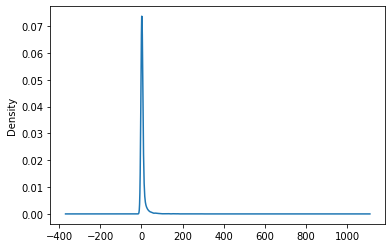

In [10]:
# Visualize the value counts of APPLICATION_TYPE
Developer_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_dev = list(Developer_counts[Developer_counts < 200].index)

# Replace in dataframe
for app in replace_dev:
    cleaned_df.Developer_x = cleaned_df.Developer_x.replace(app,"Other")
    
# Check to make sure binning was successful
cleaned_df.Developer_x.value_counts()

Other                 17865
Unknown                 741
Konami                  402
Capcom                  350
EA Canada               289
Bandai Namco Games      210
Name: Developer_x, dtype: int64

In [12]:
# Look at Publisher value counts for binning
Publisher_counts = cleaned_df['Publisher'].value_counts()
Publisher_counts

Activision         1027
Ubisoft             948
Electronic Arts     822
Konami              767
Nintendo            753
                   ... 
Dan Walters           1
Game Arts             1
ArtwareGames          1
Indie Voyage          1
GMX Media             1
Name: Publisher, Length: 926, dtype: int64

<AxesSubplot:ylabel='Density'>

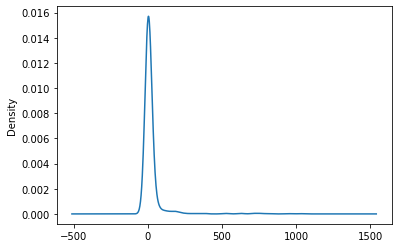

In [14]:
# Visualize the value counts of APPLICATION_TYPE
Publisher_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ...?
replace_pub = list(Publisher_counts[Publisher_counts < 700].index)

# Replace in dataframe
for app in replace_pub:
    cleaned_df.Publisher = cleaned_df.Publisher.replace(app,"Other")
    
# Check to make sure binning was successful
cleaned_df.Publisher.value_counts()

Other              14111
Activision          1027
Ubisoft              948
Electronic Arts      822
Konami               767
Nintendo             753
THQ                  718
Sega                 711
Name: Publisher, dtype: int64

In [15]:
# Look at Publisher value counts for binning
Platform_counts = cleaned_df['Platform'].value_counts()
Platform_counts

DS      2263
PS2     2218
PC      2142
PS3     1372
Wii     1360
PSP     1318
X360    1309
PS      1206
PS4      940
GBA      858
XB       836
PSV      645
3DS      627
GC       563
XOne     539
N64      322
NS       281
SNES     241
SAT      175
WiiU     161
2600     133
NES      102
GB        94
DC        52
GEN       31
NG        12
PSN       10
GBC        9
WS         7
XBL        7
SCD        6
3DO        4
Mob        4
VC         3
PCE        2
WW         1
GG         1
OSX        1
PCFX       1
Amig       1
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Density'>

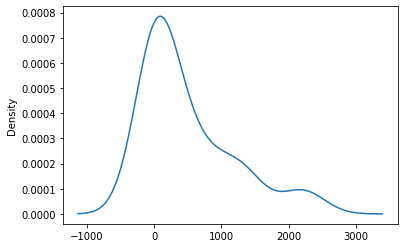

In [16]:
# Visualize the value counts of APPLICATION_TYPE
Platform_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than ...?
replace_plat = list(Platform_counts[Platform_counts < 1000].index)

# Replace in dataframe
for app in replace_plat:
    cleaned_df.Platform = cleaned_df.Platform.replace(app,"Other")
    
# Check to make sure binning was successful
cleaned_df.Platform.value_counts()

Other    6669
DS       2263
PS2      2218
PC       2142
PS3      1372
Wii      1360
PSP      1318
X360     1309
PS       1206
Name: Platform, dtype: int64

In [18]:
all_columns_df.dtypes

Rank              int64
Name             object
Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score    float64
User_Score      float64
Year            float64
Country          object
Total_Sales     float64
dtype: object

In [19]:
# Generate our categorical variable lists
sales_cat = all_columns_df.dtypes[all_columns_df.dtypes == "object"].index.tolist()
sales_cat

['Name',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer_x',
 'Country']

In [22]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(all_columns_df[sales_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(sales_cat)
encode_df.head()

C:\Users\ericn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Name_'98 Koshien,Name_.hack//G.U. Last Recode,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//G.U. Vol.3//Redemption,Name_.hack//Infection Part 1,Name_.hack//Link,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,...,Country_Norway,Country_Poland,Country_Russia,Country_South Korea,Country_Spain,Country_Sweden,Country_Ukraine,Country_United Kingdom,Country_United States,Country_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Merge one-hot encoded features and drop the originals
all_columns_df = all_columns_df.merge(encode_df, left_index=True,right_index=True)
all_columns_df = all_columns_df.drop(columns = sales_cat)
all_columns_df.head()

,Rank,Critic_Score,User_Score,Year,Total_Sales,Name_'98 Koshien,Name_.hack//G.U. Last Recode,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Country_Norway,Country_Poland,Country_Russia,Country_South Korea,Country_Spain,Country_Sweden,Country_Ukraine,Country_United Kingdom,Country_United States,Country_nan
0,1,7.7,NaN,2006.0,82.86,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10.0,NaN,1985.0,40.24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8.2,9.1,2008.0,37.14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,NaN,NaN,2017.0,36.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,8.0,8.8,2009.0,33.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays
y = all_columns_df['Total_Sales'].values
X = all_columns_df.drop(['Total_Sales']).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

KeyError: "['Total_Sales'] not found in axis"

In [ ]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")